In [5]:
import pandas as pd 
import matplotlib.pyplot as plt

from category_reducer import category_reducer
import os

In [2]:
data_path = '../Data/'

data = pd.read_csv(data_path + "news-data.csv")
df = data.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180462 entries, 0 to 180461
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Title                180462 non-null  object
 1   Content              180462 non-null  object
 2   Content_url          180462 non-null  object
 3   News_type            180462 non-null  object
 4   Day_month_year_hour  180462 non-null  object
 5   Img_url              180462 non-null  object
dtypes: object(6)
memory usage: 8.3+ MB


In [4]:
print(f"len df {len(df)}")
df = df.dropna()
df = df.drop_duplicates()
print(f"len dronna and drop_duplicates {len(df)}")

len df 180462
len dronna and drop_duplicates 180462


In [9]:
def split_date_to_year(day_month_year_hour):
    date = day_month_year_hour.split('-')[0]
    year = "20" + date.split('.')[2]
    return year

def split_date_to_month(day_month_year_hour):
    date = day_month_year_hour.split('-')[0]
    year = date.split('.')[1]
    return year

def split_date_to_day(day_month_year_hour):
    date = day_month_year_hour.split('-')[0]
    year = date.split('.')[0]
    return year

df['Yeary'] = df['Day_month_year_hour'].apply(split_date_to_year)
df['Month'] = df['Day_month_year_hour'].apply(split_date_to_month)
df['Day'] = df['Day_month_year_hour'].apply(split_date_to_day)

df = df.drop(columns=['Day_month_year_hour'])

In [10]:
def plot_type(data, explode):
    explodes = ([explode for i in range(len(set(data)))])
    value_counts = data.value_counts()
    labels = value_counts.index
    values = value_counts.values

    plt.pie(values, labels=labels, autopct='%1.f%%', explode=explodes)
    plt.show()

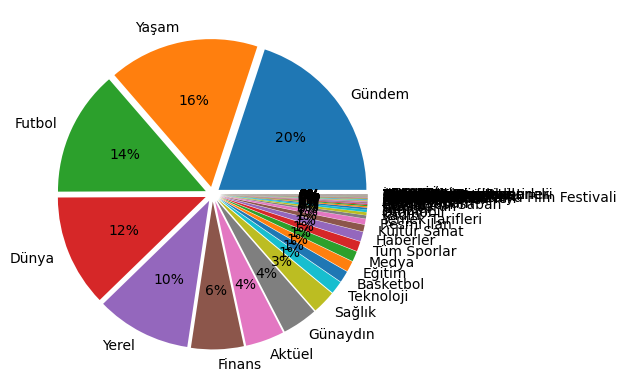

In [11]:
plot_type(df['News_type'], explode=0.05)

In [12]:
df = category_reducer(df)

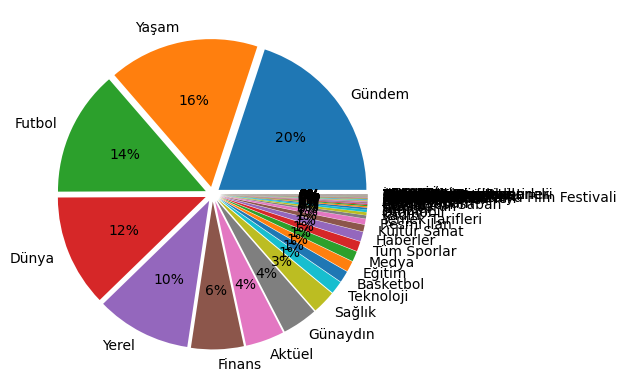

In [13]:
plot_type(df['News_type'], explode=0.05)

In [14]:
def show_news_types(index):
    return df['News_type'].value_counts()[index:index+20]

In [15]:
show_news_types(0)

Gündem             35980
Yaşam              29622
Futbol             24727
Dünya              22047
Yerel              18696
Finans             10368
Aktüel              7632
Günaydın            6960
Sağlık              4628
Teknoloji           2546
Basketbol           2282
Eğitim              2108
Medya               2023
Tüm Sporlar         1941
Haberler            1875
Kültür Sanat        1349
Resmi İlan          1097
Yemek Tarifleri      657
Kadın                569
Otomobil             494
Name: News_type, dtype: int64

In [16]:
show_news_types(20)

Turizm                                 366
Güncel                                 259
Bize Sorun                             248
Çocuk                                  189
Cumartesi Sabah                        155
Pazar Sabah                            149
Kişisel Bakım                          145
Spor                                   123
Bebek                                  119
Hamilelik                              108
Kamu Personeli                          93
İLANLAR                                 88
Ramazan                                 74
Moda                                    61
Ramazan Haberleri                       54
Bebeğim ve Biz                          36
Uluslararası Antalya Film Festivali     35
Magazin                                 35
Aile ve İlişkiler                       33
Emniyet Personeli                       32
Name: News_type, dtype: int64

In [17]:
show_news_types(40)

Keşfet                 25
Beslenme               24
Diyet                  24
Askeri Personel        24
15 Temmuz İhaneti      23
İşte İnsan             23
EMEKLİ                 22
Memurlar               21
Bölgeler               20
Oyun                   19
Kitap                  19
Sağlık Personeli       18
Öğretmen               16
Seçim                  15
Sözleşmeli Personel    13
Çocuklar İçin          12
Rüya Tabirleri         12
Teknokulis             12
Temizlik               11
Elektrik Kesintisi     11
Name: News_type, dtype: int64

In [18]:
show_news_types(60)

Güncel Memur Haberleri      10
İlişkiler                   10
Dini Hizmetler Personeli     9
Emlak                        9
Egzersizler                  8
KPSS                         8
Stil ve Öneri                6
Teknik Personel              4
Bebekler İçin                3
Yeşil Ekran                  3
Sinema                       2
31. Yıl                      2
Günün Duası                  2
Aile                         2
Astroloji                    2
Güzel Sözler                 2
Sürekli İşçi                 2
Engelli Memur                1
Hakim ve Savcı               1
Vodafone Business            1
Name: News_type, dtype: int64

In [19]:
show_news_types(80)

Akademik Personel      1
Gezegen Hareketleri    1
Doğum                  1
Haber                  1
Canlı Anlatım          1
Estetik                1
Doğalgaz Kesintisi     1
Basın İlan Kurumu      1
Name: News_type, dtype: int64